<img src="https://github.com/urcuqui/Data-Science/blob/master/Utilities/scipy.png?raw=true" height="150" width="250">

__Author: Christian Camilo Urcuqui López__

__Date: 1 February 2019__



SciPy is a package to make scientific operations which uses NumPy objects like ndarray or matrices. Some possilities to make are integration and determining a function's maxima or minima; let's start with optimization and data fitting, and then move through interpolation, integation, spatial analysis, clustering, signal and image processing, space matrices, and statistics. 

In [3]:
import scipy 
scipy.__version__

'1.2.1'

In [33]:
# other libraries that are going to use 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Optimization 

The opmization package of SciPy allows us to solve minimization problems easily and quickly, one of these examples are related with linear regression, finding a function's minimum and maximum values, determining the root of a function, and finding where two functions intersect. 

_The opmitization and minimization tools that NumPy and SciPy don't have Markov Chain Monte Carlo (MCMC) capabilities, we can find this in other packages like PyMC._

### Data Modeling and Fitting

There are several ways to fit data with linear regression, one of them is by the method **curve_fit**, which is a $X^{2}$ method.

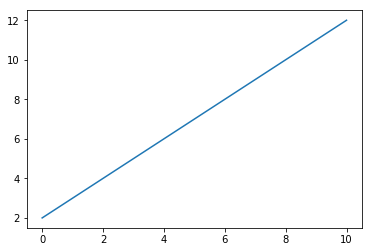

In [43]:
"""
In the next example we are going to make data from a known function with noise, 
and then fit the noisy data with curve_fit. We will model in the example is a simple linear
equation, f(x) = ax + b
"""
import numpy as np
import scipy 

# Creating a function to model and create data
def func(x, a, b):
    return a * x + b

# Generating clean data
x = np.linspace(0 ,  10, 100) # Return evenly spaced numbers over a specified interval.
y = func(x, 1, 2) # the result of our function

# let's print it the function f(x)
import matplotlib.pyplot as plt
plt.plot(x,y)

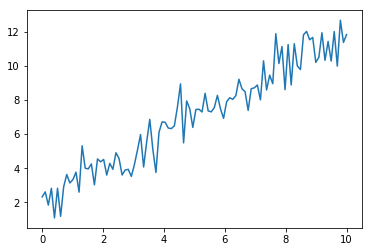

In [46]:
# adding noise to the data
yn = y + 0.9 * np.random.normal(size=len(x))
plt.plot(x, yn)

In [52]:
# Executing curve_fit on noisy data
# curve_fit -> Use non-linear least squares to fit a function
popt, pcov = curve_fit(func, x, yn)
# popt returns the best fit values for parameters of the given model
# (func)

[ 2.31802099  2.61108455  1.83631759  2.82213275  1.0851253   2.82380251
  1.17811205  2.92216274  3.62953727  3.13521741  3.33139909  3.76566224
  2.59618348  5.31378903  4.00025301  3.9608456   4.25045894  3.02469014
  4.54162174  4.37518693  4.51270803  3.59879164  4.28357777  3.93611711
  4.90483565  4.57420035  3.60023176  3.8950595   3.93350383  3.51996469
  4.21184162  5.06277486  5.97124834  4.07296221  5.54995728  6.86381877
  5.10186015  3.75096645  6.10004268  6.71530192  6.6943407   6.35675175
  6.32054993  6.48562202  7.59330665  8.94495637  5.48811528  7.9451078
  7.4884416   6.39193256  7.44276071  7.46055002  7.29634526  8.391371
  7.35996702  7.30455935  7.556579    8.27226765  7.48197168  6.92552357
  7.90280589  8.13073144  8.03900594  8.25705943  9.21397714  8.65472833
  8.48711803  7.39075067  8.66347123  8.71244642  8.87837075  8.00725808
 10.29530027  8.58849127  9.45836497  8.95655628 11.88605211 10.13757204
 11.13356787  8.60451314 11.25112372  8.88261319 11.29

In [57]:
popt

array([0.98709242, 2.09564206])

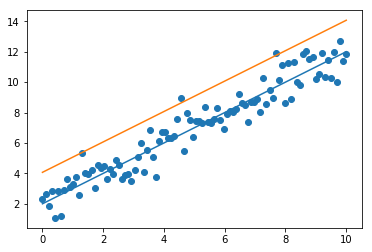

In [58]:
plt.scatter(x, yn)
plt.plot(x,y)
yn = y + popt[0] * popt[1]
plt.plot(x, yn)

The values from **popt**, if a good fit, should be close to the values for the **y** assigment. We can evaluate the quality of the fit with **pcov**,  where the diagonal elements are the variances for each parameter. 

We can do a least-squares fit to Gaussian profile, a non-linear function:

<center> $ \alpha * exp(\frac{-(x-\mu)^2}{2\sigma ^2})$ </center>
Where $\alpha$ is a scalar, $\mu$ is the mean, and $\sigma$ is the standar deviation

In [39]:
# Creating a function to model and create data
def func(x, a, b, c):
    return a * np.exp((-(x-b)**2) / (2*c**2))

# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)

# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))

# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

In [37]:
#?ord
#ord("A")
#?np.linspace Return evenly spaced numbers over a specified interval.
#?np.linspace
#?curve_fit
# print(1.1 + 2.2) wtf it must be 3.3

3.3000000000000003


Object `//` not found.
